#### KNN METHOD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv('CARDIA.csv')

In [3]:
df.head()

,Age,Sex,Chest Pain,Shortest of breath,Heaviness or tightness,Radiation into arms nack and jaw,Congestion or burning,Abnormal breathing,Losing flat cause,Decrease of sterngth,...,Fever,Clubbing,Rash,Smocking,Hypertension,Hyperchoies terolamia,Myocandial,Disease,target,Disease_r
0,31,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,20,1,PEPTICULCER
1,24,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,DYSPNOEA
2,50,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,21,1,ANEMIA
3,36,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,22,1,PHEUMONIA
4,40,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,23,1,PNECIMOTHORAX


In [4]:
df.columns

Index(['Age', 'Sex', 'Chest Pain', 'Shortest of breath',
       'Heaviness or tightness', 'Radiation into arms nack and jaw',
       'Congestion or burning', 'Abnormal breathing', 'Losing flat cause',
       'Decrease of sterngth', 'Trobale with balance',
       'Heart rate normal and faster', 'Trouble with sawllowing',
       'Low blood presure', 'Missing in heartbeat rythom/abnormal rythom',
       'Need pellow or prefer to sleep in chair', 'Syncopal attack',
       'Debilitation', 'Fever', 'Clubbing', 'Rash', 'Smocking', 'Hypertension',
       'Hyperchoies terolamia', 'Myocandial', 'Disease', 'target',
       'Disease_r'],
      dtype='object')

In [5]:
df.describe()

,Age,Sex,Chest Pain,Shortest of breath,Heaviness or tightness,Radiation into arms nack and jaw,Congestion or burning,Abnormal breathing,Losing flat cause,Decrease of sterngth,...,Debilitation,Fever,Clubbing,Rash,Smocking,Hypertension,Hyperchoies terolamia,Myocandial,Disease,target
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,...,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.00000,352.000000,352.000000
mean,50.034091,0.761364,0.343750,0.565341,0.153409,0.076705,0.088068,0.230114,0.079545,0.130682,...,0.076705,0.059659,0.039773,0.042614,0.176136,0.238636,0.105114,0.03125,15.264205,0.750000
std,17.494614,0.426857,0.475635,0.496418,0.360894,0.266501,0.283797,0.421505,0.270973,0.337532,...,0.266501,0.237191,0.195703,0.202272,0.381478,0.426857,0.307136,0.17424,10.159193,0.433629
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.000000,0.750000
50%,50.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,13.000000,1.000000
75%,65.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,28.000000,1.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,29.000000,1.000000


In [6]:
df.shape

(352, 28)

In [8]:
print('size of dataset is :',df.shape)

size of dataset is : (352, 28)


In [13]:
df['Age'].value_counts()

Age
33    28
31    25
30    20
55    13
65    13
      ..
9      1
74     1
19     1
26     1
29     1
Name: count, Length: 66, dtype: int64

In [12]:
df.head()

,Age,Sex,Chest Pain,Shortest of breath,Heaviness or tightness,Radiation into arms nack and jaw,Congestion or burning,Abnormal breathing,Losing flat cause,Decrease of sterngth,...,Fever,Clubbing,Rash,Smocking,Hypertension,Hyperchoies terolamia,Myocandial,Disease,target,Disease_r
0,31,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,20,1,PEPTICULCER
1,24,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,DYSPNOEA
2,50,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,21,1,ANEMIA
3,36,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,22,1,PHEUMONIA
4,40,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,23,1,PNECIMOTHORAX


In [14]:
x = df[['Sex','Disease']]
y = df['Age']

In [15]:
#train and test(split)
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print('size of trainng data=',x_train.shape[0])
print('size of test data=',x_test.shape[0])

size of trainng data= 281
size of test data= 71


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
minmax = MinMaxScaler()

In [20]:
minmax.fit(x_train)

MinMaxScaler()

In [21]:
train_transformed = minmax.transform(x_train)

In [22]:
test_transformed = minmax.transform(x_test)

In [23]:
x_train['balanced normalized'] = train_transformed[:,0]
x_train['income normalized'] = train_transformed[:,1]

In [24]:
x_train.head()

,Sex,Disease,balanced normalized,income normalized
341,0,7,0.0,0.241379
306,1,5,1.0,0.172414
74,0,28,0.0,0.965517
140,0,7,0.0,0.241379
21,1,4,1.0,0.137931


In [25]:
x_test['balanced normalized'] = test_transformed[:,0]
x_test['income normalized'] = test_transformed[:,1]

In [26]:
x_test.head()

,Sex,Disease,balanced normalized,income normalized
6,1,25,1.0,0.862069
52,1,3,1.0,0.103448
259,0,4,0.0,0.137931
45,1,15,1.0,0.517241
214,0,7,0.0,0.241379


#### implementing KNN Alogorithm

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn3 = KNeighborsClassifier(n_neighbors = 3,metric = 'euclidean')

In [29]:
knn3.fit(x_train[["balanced normalized","income normalized"]],y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [30]:
predictions = knn3.predict(x_test[["balanced normalized","income normalized"]])

In [31]:
predictions

array([31, 33, 44, 41, 31, 35, 38, 31, 33, 48, 31, 33, 18, 35, 31, 31, 61,
       48, 31, 33, 31, 30, 33, 52, 38, 40, 43, 31, 33, 33, 48, 48, 33, 35,
       33, 25, 28, 30, 54, 46, 31, 33, 30, 18, 31, 28, 33, 18, 31, 18, 18,
       33, 48, 31, 33, 33, 40, 52, 33, 48, 18, 31, 33, 33, 30, 25, 31, 38,
       61, 48, 30])

In [32]:
predictions_train = knn3.predict(x_train[["balanced normalized","income normalized"]])

In [33]:
predictions_train

array([31, 31, 48, 31, 33, 35, 48, 33, 18, 33, 18, 35, 41, 38, 52, 31, 30,
       35, 33, 33, 18, 38, 31, 33, 33, 28, 46, 43, 38, 61, 28, 38, 61, 35,
       18, 33, 33, 33, 18, 33, 30, 40, 30, 33, 52, 33, 28, 54, 52, 33, 33,
       18, 33, 33, 38, 33, 33, 33, 18, 33, 33, 33, 18, 44, 18, 35, 46, 33,
       34, 33, 45, 38, 35, 46, 30, 31, 52, 40, 61, 33, 61, 34, 38, 44, 46,
       33, 33, 61, 33, 33, 31, 41, 52, 33, 33, 33, 33, 31, 35, 34, 35, 33,
       61, 33, 35, 33, 33, 35, 34, 31, 31, 33, 31, 61, 54, 28, 31, 28, 18,
       54, 52, 31, 33, 30, 33, 44, 33, 48, 40, 18, 30, 48, 33, 18, 28, 18,
       33, 33, 33, 33, 46, 34, 31, 31, 33, 34, 40, 38, 34, 48, 33, 35, 33,
       30, 33, 33, 52, 33, 33, 31, 31, 33, 31, 34, 28, 33, 52, 33, 46, 33,
       30, 48, 46, 31, 18, 31, 33, 61, 18, 31, 33, 18, 28, 31, 33, 48, 61,
       33, 35, 43, 41, 31, 33, 33, 18, 38, 33, 18, 35, 18, 35, 52, 33, 31,
       61, 18, 28, 31, 31, 44, 33, 40, 28, 33, 48, 45, 25, 46, 33, 33, 33,
       30, 38, 33, 33, 33

#### accuracy measure¶

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
test_accuracy = accuracy_score(y_test,predictions)

In [36]:
print("Test accuracy =",test_accuracy)

Test accuracy = 0.07042253521126761


In [37]:
train_accuracy = accuracy_score(y_train,predictions_train)

In [38]:
print("Train accuracy =",train_accuracy)

Train accuracy = 0.20284697508896798


In [39]:
knn5 = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean')
knn5.fit(x_train[["balanced normalized","income normalized"]],y_train)
knn3 = KNeighborsClassifier(n_neighbors = 3,metric = 'euclidean')
knn3.fit(x_train[["balanced normalized","income normalized"]],y_train)
test_predictions = knn3.predict(x_test[["balanced normalized","income normalized"]])
train_predictions = knn3.predict(x_train[["balanced normalized","income normalized"]])
test_accuracy = accuracy_score(y_test,predictions)
print("Test accuracy =",test_accuracy)
train_accuracy = accuracy_score(y_train,predictions_train)
print("Train accuracy =",train_accuracy)

Test accuracy = 0.07042253521126761
Train accuracy = 0.20284697508896798


#### finding optimal value for k¶

In [40]:
test_accuracies = []
train_accuracies = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_train[["balanced normalized","income normalized"]],y_train)
    test_prediction = knn.predict(x_test[["balanced normalized","income normalized"]])
    train_prediction = knn.predict(x_train[["balanced normalized","income normalized"]])                       
    test_accuracy = accuracy_score(y_test,test_prediction)    
    train_accuracy = accuracy_score(y_train,train_prediction)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

In [41]:
test_accuracies

[0.028169014084507043,
 0.07042253521126761,
 0.08450704225352113,
 0.07042253521126761,
 0.056338028169014086,
 0.028169014084507043,
 0.028169014084507043,
 0.056338028169014086]

In [42]:
train_accuracies

[0.22419928825622776,
 0.20284697508896798,
 0.18861209964412812,
 0.18861209964412812,
 0.18149466192170818,
 0.18505338078291814,
 0.17793594306049823,
 0.15302491103202848]

#### visualizing the result

In [52]:
k_values = list(range(1,16,2))
k_values

[1, 3, 5, 7, 9, 11, 13, 15]

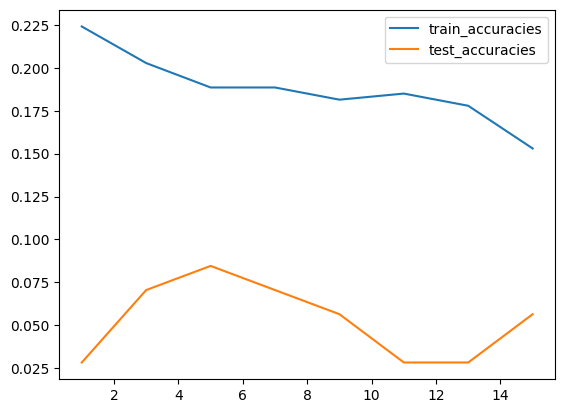

In [53]:
plt.plot(k_values,train_accuracies)
plt.plot(k_values,test_accuracies)
plt.legend(['train_accuracies','test_accuracies'])

#### cross validation (k fold)

In [54]:
from sklearn.model_selection import cross_validate

In [55]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
cv_result = cross_validate(knn,x_train[["balanced normalized","income normalized"]],y_train,cv=4,return_train_score = True)
cv_result

{'fit_time': array([0.00523424, 0.00910878, 0.        , 0.00099611]),
 'score_time': array([0.00435066, 0.0100801 , 0.01435828, 0.        ]),
 'test_score': array([0.02816901, 0.04285714, 0.04285714, 0.07142857]),
 'train_score': array([0.1952381 , 0.21327014, 0.21800948, 0.1943128 ])}

In [56]:
print("Training Data Accuracy ",cv_result["train_score"])

Training Data Accuracy  [0.1952381  0.21327014 0.21800948 0.1943128 ]


In [57]:
print("Testing Data Accuracy ",cv_result["test_score"])

Testing Data Accuracy  [0.02816901 0.04285714 0.04285714 0.07142857]


In [58]:
print("Training Data Average Accuracy ",cv_result["train_score"].mean()*100)

Training Data Average Accuracy  20.520762807492666


In [59]:
print("Testing Data Average Accuracy ",cv_result["test_score"].mean()*100)

Testing Data Average Accuracy  4.632796780684105


In [60]:
knn.fit(x_train[["balanced normalized","income normalized"]],y_train)

KNeighborsClassifier(metric='euclidean')

In [61]:
test_predictions =  knn.predict(x_test[["balanced normalized","income normalized"]])

In [62]:
test_accuracy = accuracy_score(y_test,test_predictions)

In [63]:
test_accuracy

0.08450704225352113

#### grid search cv¶

In [64]:
 from sklearn.model_selection import GridSearchCV

In [65]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "euclidean")

In [66]:
param_grid = {"n_neighbors":np.arange(1,16,2)}

In [67]:
knn_with_gs = GridSearchCV(knn,param_grid,return_train_score=True,verbose=True,scoring="accuracy")

In [68]:
knn_with_gs.fit(x_train[["balanced normalized","income normalized"]],y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])},
             return_train_score=True, scoring='accuracy', verbose=True)

In [69]:
knn_with_gs.cv_results_

{'mean_fit_time': array([0.00539746, 0.00088472, 0.00500321, 0.00352564, 0.00302248,
        0.00702353, 0.00348868, 0.00594058]),
 'std_fit_time': array([0.00584858, 0.00108986, 0.00562021, 0.00656377, 0.00604496,
        0.00415438, 0.00292945, 0.00508245]),
 'mean_score_time': array([0.00767589, 0.00483999, 0.00727301, 0.00817838, 0.00705647,
        0.00594697, 0.00905523, 0.00742679]),
 'std_score_time': array([0.00566966, 0.00635484, 0.0086317 , 0.00717515, 0.00823571,
        0.00338775, 0.00252298, 0.00129845]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'n_neighbors': np.int64(1)},
  {'n_neighbors': np.int64(3)},
  {'n_neighbors': np.int64(5)},
  {'n_neighbors': np.int64(7)},
  {'n_neighbors': np.int64(9)},
  {'n_neighbors': np.int64(11)},
  {'n_neighbors': np.int64(13)},
  {'n_neighbors': np.int64(15)}],
 'split0_test_score': array([0

In [70]:
tunned_df = pd.DataFrame(knn_with_gs.cv_results_)
tunned_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005397,0.005849,0.007676,0.005670,1,{'n_neighbors': 1},0.017544,0.035714,0.071429,0.053571,...,0.049937,0.020922,2,0.254464,0.262222,0.257778,0.262222,0.253333,0.258004,0.003741
1,0.000885,0.001090,0.004840,0.006355,3,{'n_neighbors': 3},0.017544,0.053571,0.035714,0.017857,...,0.035652,0.016042,6,0.241071,0.213333,0.222222,0.222222,0.204444,0.220659,0.012150
2,0.005003,0.005620,0.007273,0.008632,5,{'n_neighbors': 5},0.035088,0.053571,0.017857,0.053571,...,0.039160,0.013399,5,0.227679,0.191111,0.208889,0.213333,0.208889,0.209980,0.011687
3,0.003526,0.006564,0.008178,0.007175,7,{'n_neighbors': 7},0.017544,0.035714,0.000000,0.035714,...,0.024937,0.014318,8,0.214286,0.204444,0.204444,0.195556,0.186667,0.201079,0.009331
4,0.003022,0.006045,0.007056,0.008236,9,{'n_neighbors': 9},0.017544,0.017857,0.017857,0.035714,...,0.028509,0.014333,7,0.191964,0.191111,0.168889,0.200000,0.182222,0.186837,0.010595
5,0.007024,0.004154,0.005947,0.003388,11,{'n_neighbors': 11},0.017544,0.017857,0.071429,0.035714,...,0.042794,0.024288,4,0.178571,0.164444,0.173333,0.155556,0.177778,0.169937,0.008770
6,0.003489,0.002929,0.009055,0.002523,13,{'n_neighbors': 13},0.000000,0.053571,0.071429,0.017857,...,0.042857,0.029014,3,0.147321,0.155556,0.155556,0.164444,0.177778,0.160131,0.010353
7,0.005941,0.005082,0.007427,0.001298,15,{'n_neighbors': 15},0.052632,0.035714,0.089286,0.017857,...,0.053383,0.025257,1,0.142857,0.155556,0.146667,0.155556,0.151111,0.150349,0.004990


In [71]:
tunned_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [72]:
tunned_df = tunned_df[["param_n_neighbors","mean_test_score","mean_train_score"]]

In [73]:
tunned_df

,param_n_neighbors,mean_test_score,mean_train_score
0,1,0.049937,0.258004
1,3,0.035652,0.220659
2,5,0.039160,0.209980
3,7,0.024937,0.201079
4,9,0.028509,0.186837
5,11,0.042794,0.169937
6,13,0.042857,0.160131
7,15,0.053383,0.150349


In [74]:
knn11 = KNeighborsClassifier(n_neighbors = 11,metric = 'euclidean')
knn11.fit(x_train[["balanced normalized","income normalized"]],y_train)
test_predictions = knn11.predict(x_test[["balanced normalized","income normalized"]])
train_predictions = knn11.predict(x_train[["balanced normalized","income normalized"]])
test_accuracy = accuracy_score(y_test,predictions)
print("Test accuracy =",test_accuracy)
train_accuracy = accuracy_score(y_train,predictions_train)
print("Train accuracy =",train_accuracy)

Test accuracy = 0.07042253521126761
Train accuracy = 0.20284697508896798


In [75]:
knn_with_gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=np.int64(15))

#### confusion matrix evalaution measure

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
con = confusion_matrix(y_test,test_predictions)
print("conconfusion_matrix :\n",con)

conconfusion_matrix :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
